In [44]:
# ----------------------------------------
# 1. IMPORT NECESSARY LIBRARIES & SETTINGS
# ----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability in output
pd.set_option('display.max_columns', None)  
np.random.seed(42)   

In [45]:

# ----------------------------------------
# 2. LOAD THE DATASET
# ----------------------------------------

df = pd.read_csv('personality_dataset.csv')    


In [46]:
# ----------------------------------------
# 3. INITIAL PREVIEW
# ----------------------------------------

print(df.head())

print("\n🧾 Dataset summary (before cleaning):")
df.info()

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  

🧾 Dataset summary (before cleaning):
<class 'pandas.core.frame.DataFrame'>
Range

In [47]:
#ISSUES IDENTIFIED AFTER INITIAL DATA CHECK
# ----------------------------------------
# Key Issues Identified:
# TOTAL_ROWS = 2900
# 1. Outliers:
#    - 'Time_spent_Alone' may have invalid negative values (e.g., -1).
# 2. Missing Values:
#    - Numeric: 'Time_spent_Alone' (63), 'Social_event_attendance' (62), 'Going_outside' (66),
#      'Friends_circle_size' (77), 'Post_frequency' (65)
#    - Categorical: 'Stage_fear' (73), 'Drained_after_socializing' (52)
# 3. Slight Imbalance:
#    - Personality types might be unevenly distributed.


In [48]:

# ----------------------------------------
# 5. SUMMARY STATISTICS
# ----------------------------------------

print("\n📊 Summary statistics for numeric columns:")
print(df.describe())


📊 Summary statistics for numeric columns:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.00

In [49]:
# ----------------------------------------
# 6. FIX OUTLIERS IN 'Time_spent_Alone'
# ----------------------------------------

# Use .clip(lower=0) to replace negative values with 0 (more efficient and pythonic)
df['Time_spent_Alone'] = df['Time_spent_Alone'].clip(lower=0) 

In [50]:

# Fill missing numerical values with median (using a loop for all numeric columns)
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                   'Friends_circle_size', 'Post_frequency']
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Drop rows with missing categorical values
df = df.dropna(subset=['Stage_fear', 'Drained_after_socializing', 'Personality'])

print("\n Dataset info after cleaning:")
df.info()


 Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2776 non-null   float64
 1   Stage_fear                 2776 non-null   object 
 2   Social_event_attendance    2776 non-null   float64
 3   Going_outside              2776 non-null   float64
 4   Drained_after_socializing  2776 non-null   object 
 5   Friends_circle_size        2776 non-null   float64
 6   Post_frequency             2776 non-null   float64
 7   Personality                2776 non-null   object 
dtypes: float64(5), object(3)
memory usage: 195.2+ KB


In [51]:

# ----------------------------------------
# 8. PERSONALITY CLASS DISTRIBUTION
# ----------------------------------------

print(df['Personality'].value_counts())

Personality
Extrovert    1431
Introvert    1345
Name: count, dtype: int64


/var/folders/vn/cs0gyvxx13q8kmbcvqjbx4rc0000gn/T/ipykernel_2032/3418239789.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_time_alone.index, y=mean_time_alone.values, palette='Set2')


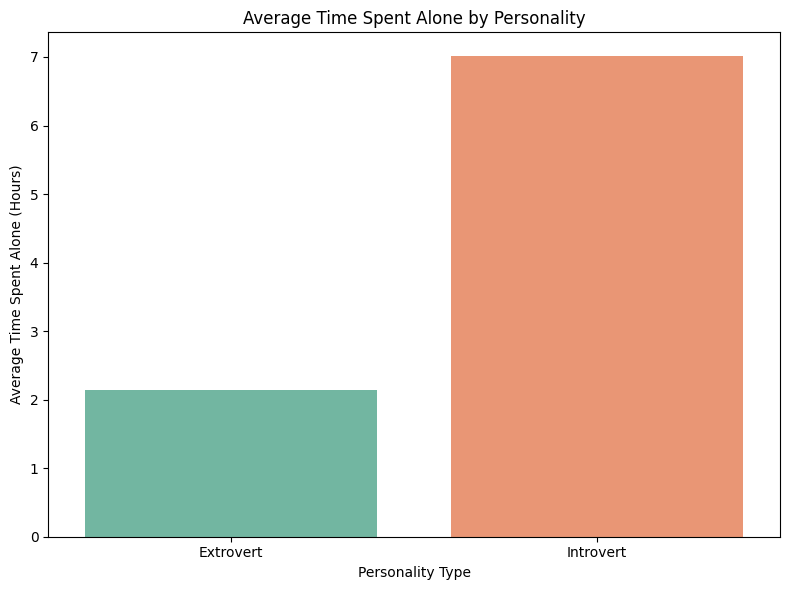

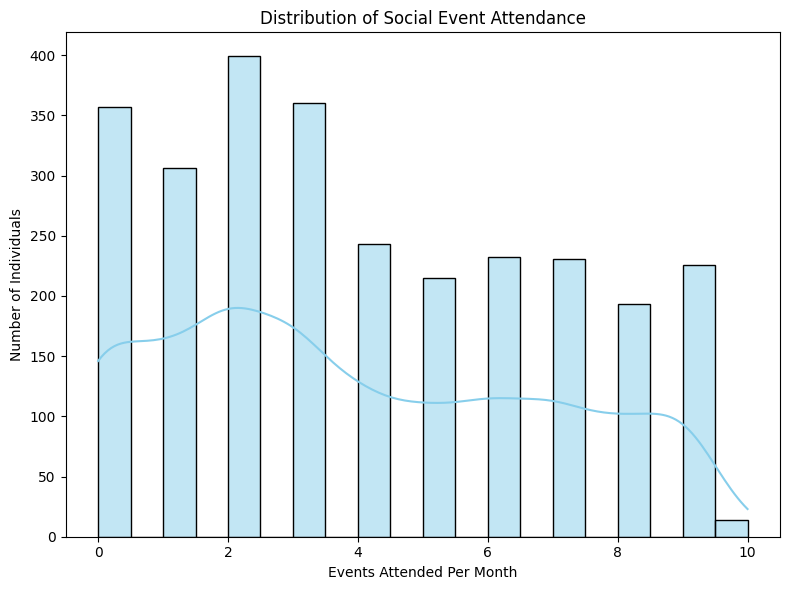

In [52]:
# Here Above:
# Extrovert: 1431
# Introvert: 1345
# The dataset shows a slight imbalance in the number of Extroverts vs Introverts.
# This is not unusual in real world datasets and does not require resampling,
# especially since the difference is minor. However, it's good practice to be aware
# of this before training any models or interpreting results.

# ----------------------------------------
# 9. VISUALIZATION: TIME SPENT ALONE BY PERSONALITY
# ----------------------------------------

mean_time_alone = df.groupby('Personality')['Time_spent_Alone'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=mean_time_alone.index, y=mean_time_alone.values, palette='Set2')
plt.title('Average Time Spent Alone by Personality')
plt.xlabel('Personality Type')
plt.ylabel('Average Time Spent Alone (Hours)')
plt.tight_layout() 
plt.show()

# ----------------------------------------
# 10. VISUALIZATION: SOCIAL EVENT ATTENDANCE DISTRIBUTION
# ----------------------------------------

plt.figure(figsize=(8, 6))
sns.histplot(df['Social_event_attendance'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Social Event Attendance')
plt.xlabel('Events Attended Per Month')
plt.ylabel('Number of Individuals')
plt.tight_layout()   
plt.show()

/var/folders/vn/cs0gyvxx13q8kmbcvqjbx4rc0000gn/T/ipykernel_2032/3212593570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y='Social_event_attendance', data=df, palette='pastel')


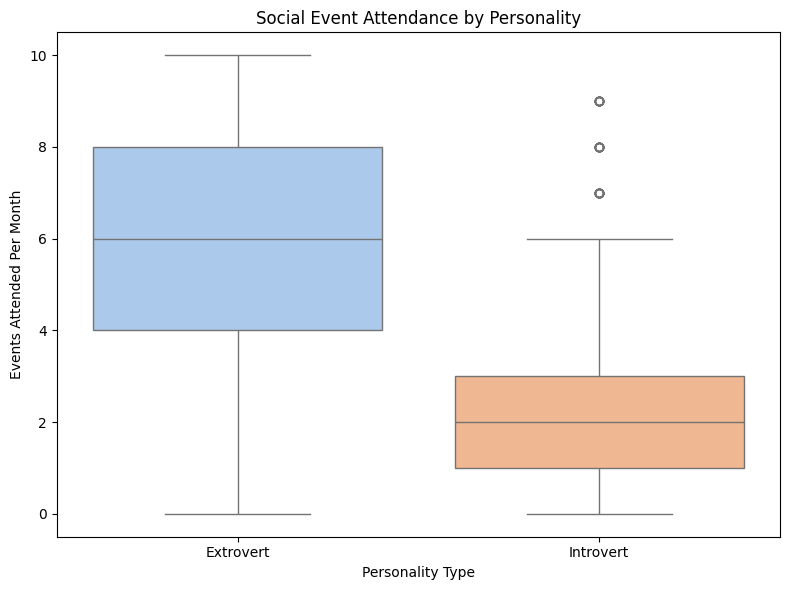


Some thoughts and observations from the data:
On average, Introverts spend about 7.01 hours alone, while Extroverts spend around 2.14 hours.
That matches what you usually expect introverts generally value alone time more.
When it comes to social events, Extroverts attend about 5.94 events per month, compared to 1.83 for Introverts.
In Section 11, I added a boxplot that breaks down social event attendance by personality.
It showed that extroverts not only attend more events on average but also have more variation some are super active socially, others more moderate.
Introverts are more consistent, with lower event attendance and fewer outliers.
Another interesting thing: some people report feeling drained after socializing, but still attend a lot of events. Maybe they're required to, or maybe they are just powering through it.
These patterns could actually be useful when thinking about designing wellbeing programs or giving advice tailored to different personality types.


In [53]:
# ----------------------------------------
# 11. VISUALIZATION: SOCIAL EVENT ATTENDANCE BY PERSONALITY
# ----------------------------------------

plt.figure(figsize=(8, 6))
sns.boxplot(x='Personality', y='Social_event_attendance', data=df, palette='pastel')
plt.title('Social Event Attendance by Personality')
plt.xlabel('Personality Type')
plt.ylabel('Events Attended Per Month')
plt.tight_layout()
plt.show()

# ----------------------------------------
# 12. FINAL INSIGHTS
# ----------------------------------------

# Calculate exact means for Time Spent Alone and Social Event Attendance
mean_time_alone = df.groupby('Personality')['Time_spent_Alone'].mean()
mean_event_attendance = df.groupby('Personality')['Social_event_attendance'].mean()

print("\nSome thoughts and observations from the data:")
print(f"On average, Introverts spend about {mean_time_alone['Introvert']:.2f} hours alone, while Extroverts spend around {mean_time_alone['Extrovert']:.2f} hours.")
print("That matches what you usually expect introverts generally value alone time more.")
print(f"When it comes to social events, Extroverts attend about {mean_event_attendance['Extrovert']:.2f} events per month, compared to {mean_event_attendance['Introvert']:.2f} for Introverts.")
print("In Section 11, I added a boxplot that breaks down social event attendance by personality.")
print("It showed that extroverts not only attend more events on average but also have more variation some are super active socially, others more moderate.")
print("Introverts are more consistent, with lower event attendance and fewer outliers.")
print("Another interesting thing: some people report feeling drained after socializing, but still attend a lot of events. Maybe they're required to, or maybe they are just powering through it.")
print("These patterns could actually be useful when thinking about designing wellbeing programs or giving advice tailored to different personality types.")

# ----------------------------------------

In [54]:
df.to_csv('personality_dataset_cleaned.csv', index=False)
print("\n Data cleaning and analysis complete. Cleaned dataset saved as 'personality_dataset_cleaned.csv' to use in PowerBi for further data modelling and dashboard creation.")
# The Cleaned Data Set Will Be Used In PowerBi For Further Data Modelling And Dashboard Creation.
# ----------------------------------------


 Data cleaning and analysis complete. Cleaned dataset saved as 'personality_dataset_cleaned.csv' to use in PowerBi for further data modelling and dashboard creation.
